# Homework 7:

## Please put your name into the filename you submit.

### Note
For each question, there is the description and the coding block.  In the coding block, please finish the code with the hints provided.

You are free to use previous notes, google and all the other support.  I also encourage you to discuss with the other students in the class if anything is not clear.  Homework is for you to practice what we have learned during the class.

The homework will be due the end of the day before the next class.  For example, if I give you the homework on Thursday, then it will be due the end of the upcoming Monday.

# Q1

#### Please plot the function
$$ y=x + cos(x) - 5 $$

#### Please solve the root of the equation
$$ x + cos(x) - 5=0 $$
#### using a good initial guess from plotting the function above

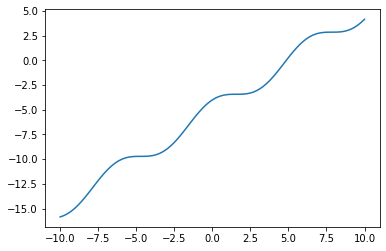

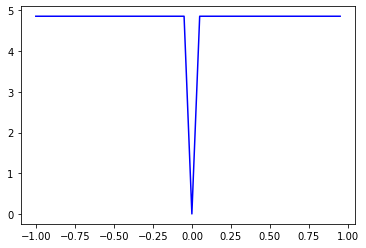

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

# plot the figure here
x = np.linspace(-10,10,100)
y = x + np.cos(x) - 5
plt.plot(x,y)
plt.show()

# define the function
def func(x):
    return x + np.cos(x) - 5

# solve the function
res=[]
for x0 in np.arange(-1,1,0.05):
    res.append((x0,fsolve(func,x0 = x0)))
res=np.array(res)

plt.plot(res[:,0],res[:,1],'b')
plt.show()

# Q2

#### Try to minimize the equation below:
$$ y= x ^ 2 + 5x + 3 $$ 
#### print out `x` minimizing the equation and the minimum value of the function (`fun`)

[2.5]


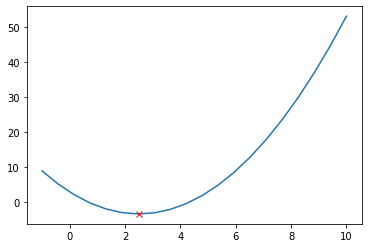

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x=np.linspace(-1, 10 ,20)

def func(x):
    return x**2 - 5*x + 3
plt.plot(x,func(x))

res=minimize(func , x0=10,method='Nelder-Mead' ) 

x=res.x
print(x)
plt.plot(x,func(x),'rx')
plt.show()

# Q3

#### Try to fit the binomial distribution data with n=100 and p=0.2 to the equation:
$$ f(x) = a \cdot exp(\frac{-(x-x0)^2}{2b^2})  $$
#### with three fitting parameters, `a`, `b` and `x0`

#### Print `b`, `np(1-p)`, `x0` and `np` to verify if 
$$ b=\sqrt{n p (1-p)}$$
$$ x0=np$$


[2.46641776 0.95965348 1.23302022]


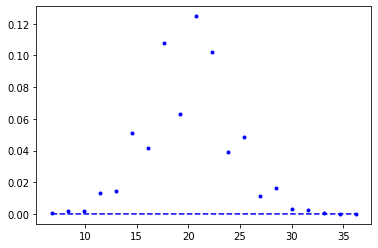

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import binom

data=binom(100,0.2).rvs(size=10000)
y,q=np.histogram(data,bins=20,density=True)
x=(q[1:]+q[:-1])/2.
plt.plot(x,y,'b.')

def func(x,a,b,x0):
    return a*np.exp( (-(x - x0)**2) / 2*(b**2) )

res,err=curve_fit(func,x,y)
print(res)
plt.plot(x,func(x,*res),'b--')

plt.show()